## Geração dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
nivel_mistura = 0.5
n_pontos_por_classe = 50
n_total = n_pontos_por_classe * 2

x = np.random.uniform(0, 1, n_total)
y = np.random.uniform(0, 1, n_total)

dist_11 = np.sqrt((x - 1)**2 + (y - 1)**2)
dist_00 = np.sqrt((x - 0)**2 + (y - 0)**2)

prob_classe_1 = (dist_00 - dist_11 + np.random.normal(0, nivel_mistura, n_total)) / 2

indices_ordenados = np.argsort(prob_classe_1)

labels = np.ones(n_total) * -1
labels[indices_ordenados[-n_pontos_por_classe:]] = 1

X = np.column_stack((x, y))
Y = labels

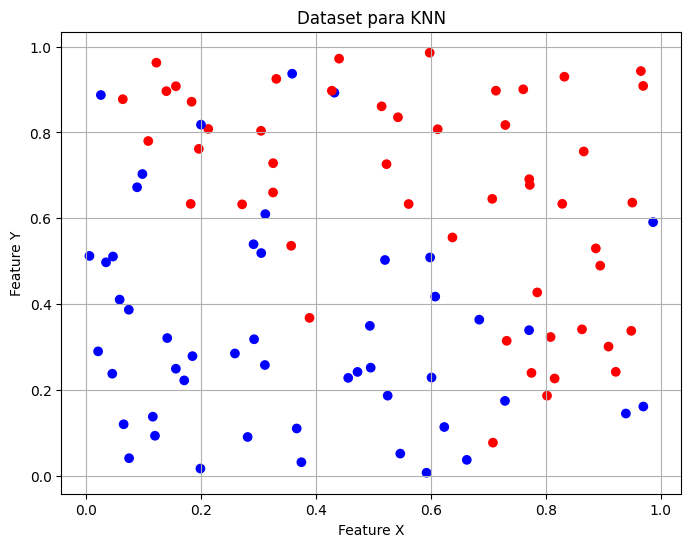

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('Dataset para KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

In [12]:
k = 9
xt = np.array([0.5, 0.5]).reshape(2,1)


In [13]:
def knn(X, Y, xt, k):
    dist = (((X.T-xt).T)**2).sum(axis=1)
    pred = np.sign(labels[dist.argsort()[:k]].sum())
    return pred

In [14]:
knn(X, Y, xt, k)

-1.0

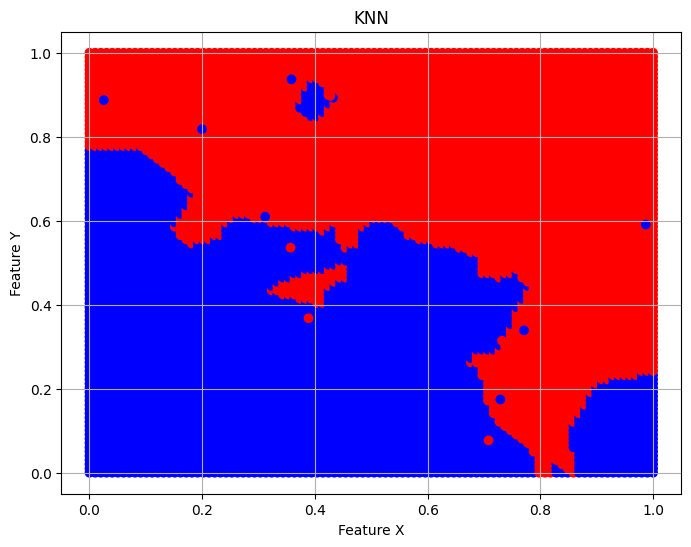

In [69]:
k=3

results_coords = []
results_labels = []
for i in np.linspace(0, 1, 100):
    for j in np.linspace(0, 1, 100):
        xt = np.array([i, j])
        results_coords.append(xt)
        label = knn(X, Y, xt.reshape(2,1), k)
        results_labels.append(label)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='bwr', marker='o')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

---

In [15]:
k = 9
xt = np.array([0.5, 0.5]).reshape(2,1)

In [63]:
def pdfnvar(x, m, K, n=2):
    x = np.asarray(x).reshape(-1)  # Garante que x é um vetor 1D
    m = np.asarray(m).reshape(-1)  # Garante que m é um vetor 1D
    diff = x - m
    exponent = -0.5 * np.dot(diff.T, np.linalg.solve(K, diff))  # Usa np.linalg.solve para evitar problemas
    denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(K))
    return (1 / denominator) * np.exp(exponent)


In [67]:
def knn_dist(X, Y, xt, k , h=2):
    dist = (((X.T-xt).T)**2).sum(axis=1)
    n = X.shape[1]
    K = h*np.eye(n)
    sumk = 0
    for datapoint,label in zip(X[dist.argsort()[:k]],labels[dist.argsort()[:k]]):
        sumk += label * pdfnvar(datapoint, xt, K, n)
    pred = np.sign(sumk)
    return pred

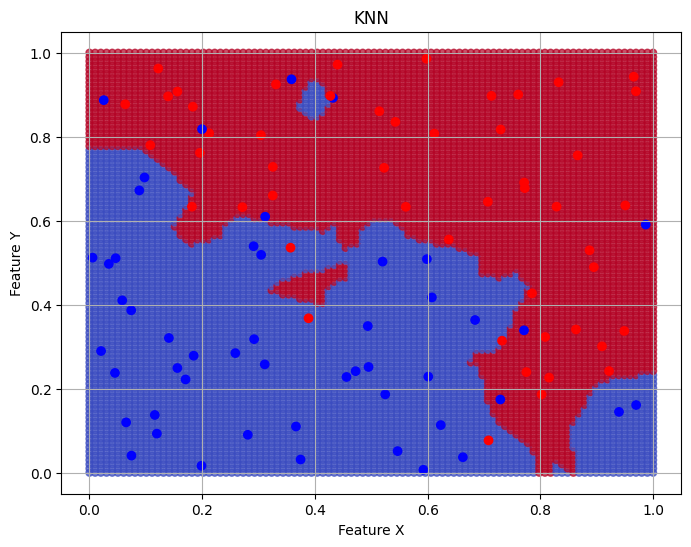

In [87]:
k=3

results_coords = []
results_labels = []
for i in np.linspace(0, 1, 100):
    for j in np.linspace(0, 1, 100):
        xt = np.array([i, j])
        results_coords.append(xt)
        label = knn_dist(X, Y, xt.reshape(2,1), k, h=2)
        results_labels.append(label)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm',alpha=0.7,s=100,marker=".")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()

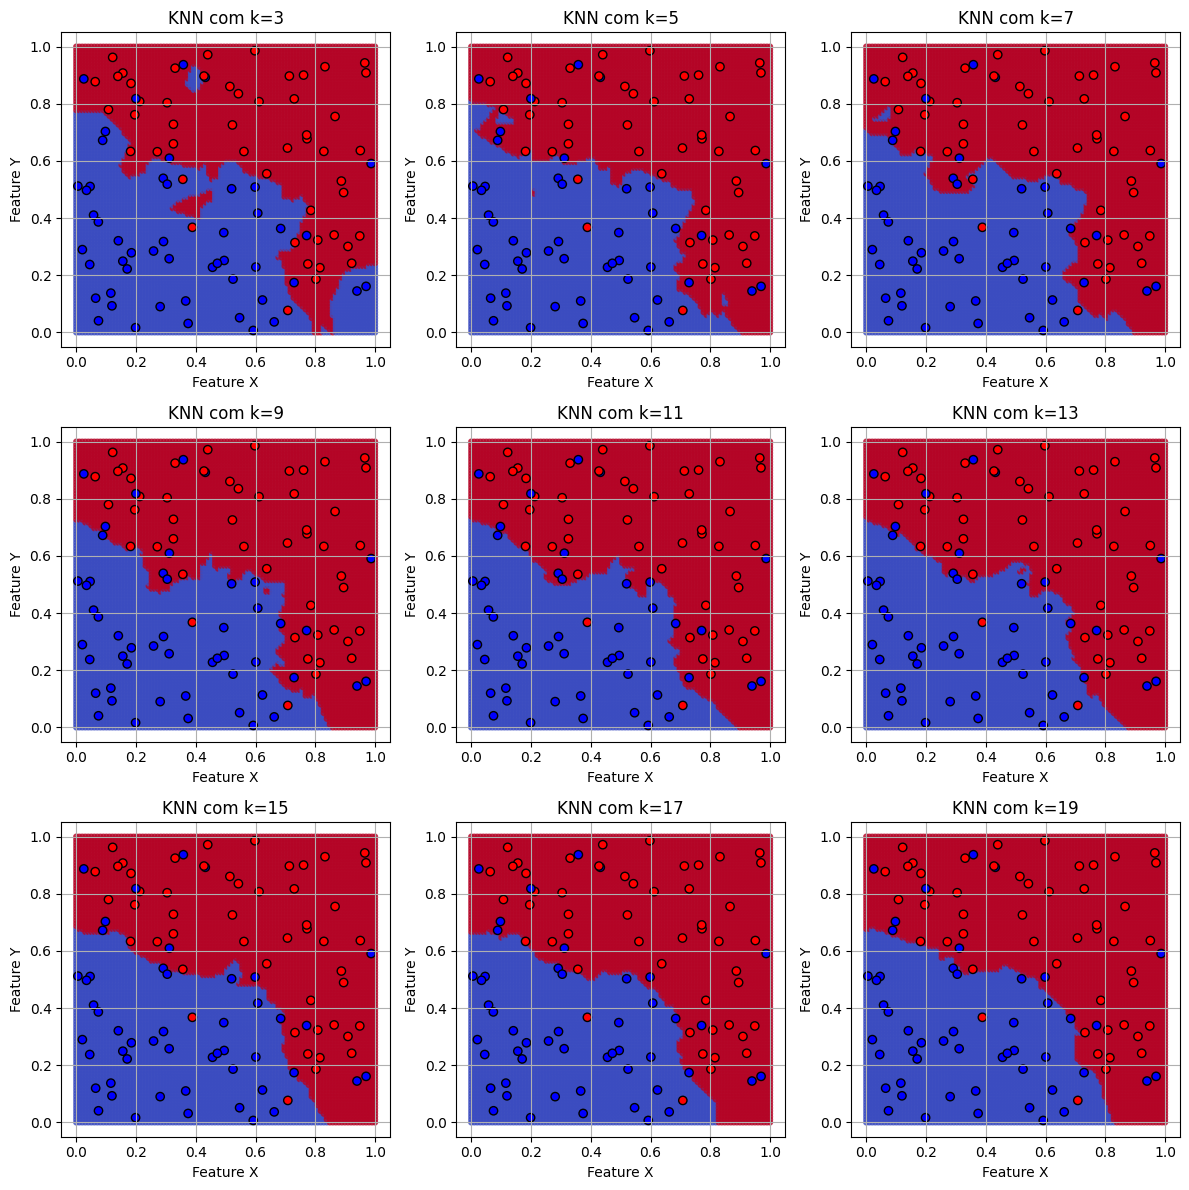

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  

k_values = range(3, 21, 2) 

for ax, k in zip(axes.ravel(), k_values):  
    results_coords = []
    results_labels = []

    for i in np.linspace(0, 1, 100):
        for j in np.linspace(0, 1, 100):
            xt = np.array([i, j])
            results_coords.append(xt)
            label = knn_dist(X, Y, xt.reshape(2, 1), k)
            results_labels.append(label)

    results_coords = np.array(results_coords)
    ax.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm', alpha=0.7, s=50, marker=".")
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o', edgecolors='black')
    ax.set_title(f'KNN com k={k}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

plt.tight_layout()
plt.show()

---

In [115]:
def knn_dist_vect(X, Y, xt, k , h=2):
    dist = (((X.T-xt).T)**2).sum(axis=1)
    n = X.shape[1]
    K = h*np.eye(n)
    sum_neg = 0
    sum_pos = 0
    for datapoint,label in zip(X[dist.argsort()[:k]],labels[dist.argsort()[:k]]):
        if label ==1:
            sum_pos += label * pdfnvar(datapoint, xt, K, n)
        else:
            sum_neg += label * pdfnvar(datapoint, xt, K, n)
    pred = np.sign((sum_pos+sum_neg))
    pred_vec = np.array([sum_pos,-1*sum_neg])
    return pred, pred_vec

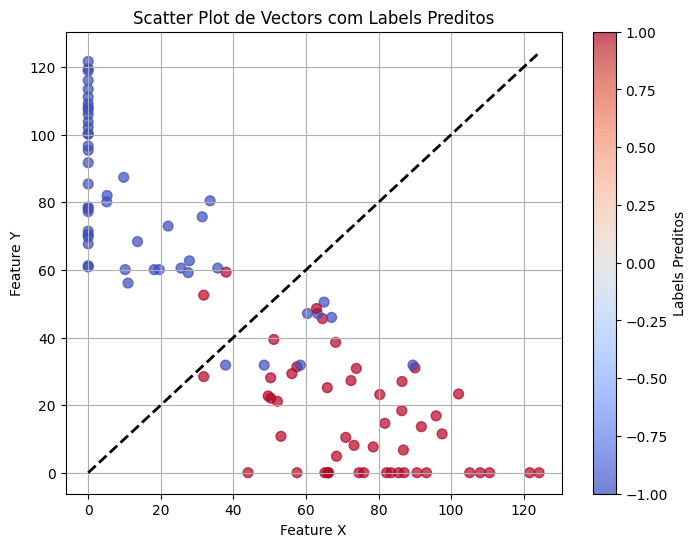

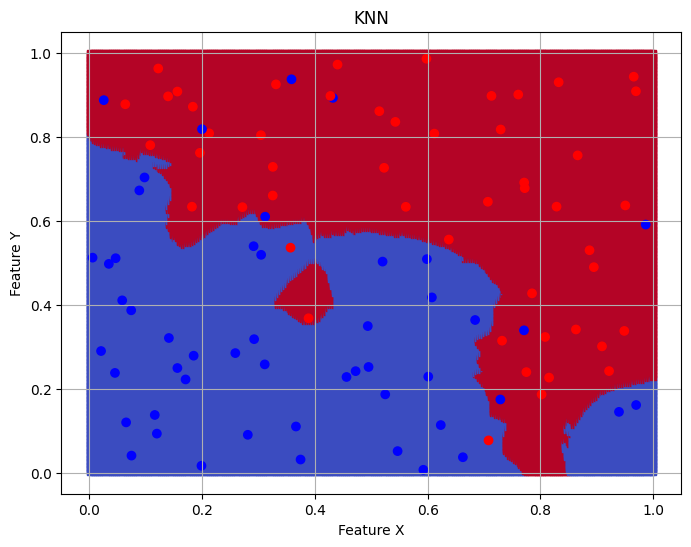

In [140]:
vectors = []
labels_pred =[]
k=5 
h= 0.005
for xt in X:
    pred,pred_vec = knn_dist_vect(X, Y, xt.reshape(2, 1), k , h=h)
    vectors.append(pred_vec)
    labels_pred.append(pred)

vectors = np.array(vectors)

plt.figure(figsize=(8, 6))
plt.scatter(vectors[:, 0], vectors[:, 1], c=labels, cmap='coolwarm', alpha=0.7, s=50, marker="o")
x_vals = np.linspace(min(vectors[:, 0]), max(vectors[:, 0]), 100)
plt.plot(x_vals, x_vals, linestyle="--", color="black", linewidth=2, label="X = Y")
plt.colorbar(label="Labels Preditos")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot de Vectors com Labels Preditos")
plt.grid(True)
# plt.show()

results_coords = []
results_labels = []
for i in np.linspace(0, 1, 300):
    for j in np.linspace(0, 1, 300):
        xt = np.array([i, j])
        results_coords.append(xt)
        pred,pred_vec = knn_dist_vect(X, Y, xt.reshape(2, 1), k , h=h)
        results_labels.append(pred)

results_coords = np.array(results_coords)
plt.figure(figsize=(8, 6))
plt.scatter(results_coords[:, 0], results_coords[:, 1], c=results_labels, cmap='coolwarm',alpha=1,s=15,marker="s")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', marker='o')
plt.title('KNN')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()